# Análisis de Series Temporales

En el siguiente notebook vamos a ver las series temporales, que son datos en los que tenemos un eje temporal. En este caso, no podemos tratar los datos separándolos de forma aleatoria, ya que existe un factor temporal que podría alterar los resultados.

A continuación, en la sigueinte serie de notebooks, trataremos los aspectos más importantes de las series temporales, que son tantos y tan importantes, que no podemos incluirlos dentro de los grandes apartados que hemos visto hasta ahora. Además, este tipo de datos son muy comunes, ya que el factor temporal está presente en la mayoría de datasets. Sin embargo, no te creas que lo que hemos visto hasta este momento no nos ha servido para casi nada, ya que podremos utilizar mucho de lo que hemos visto hasta ahora con ciertas consideraciones.

Para seguir este notebook, veremos un poquillo de teoría, así que prepárate para lo que viene.

## 1. Importamos las librerías principales y leemos el dataset

Al igual que hemos hecho en el resto de notebooks, comenzaremos importando las librerías que vamos a utilizar, y continuando con la lectura del dataset que vamos a utilizar a lo largo del notebook.

En este caso, se trata del fichero ``data/a10.csv``, que contiene información sobre diferentes fármacos:

In [8]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [9]:
df = pd.read_csv('data/a10.csv', parse_dates = ['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    204 non-null    datetime64[ns]
 1   value   204 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.3 KB


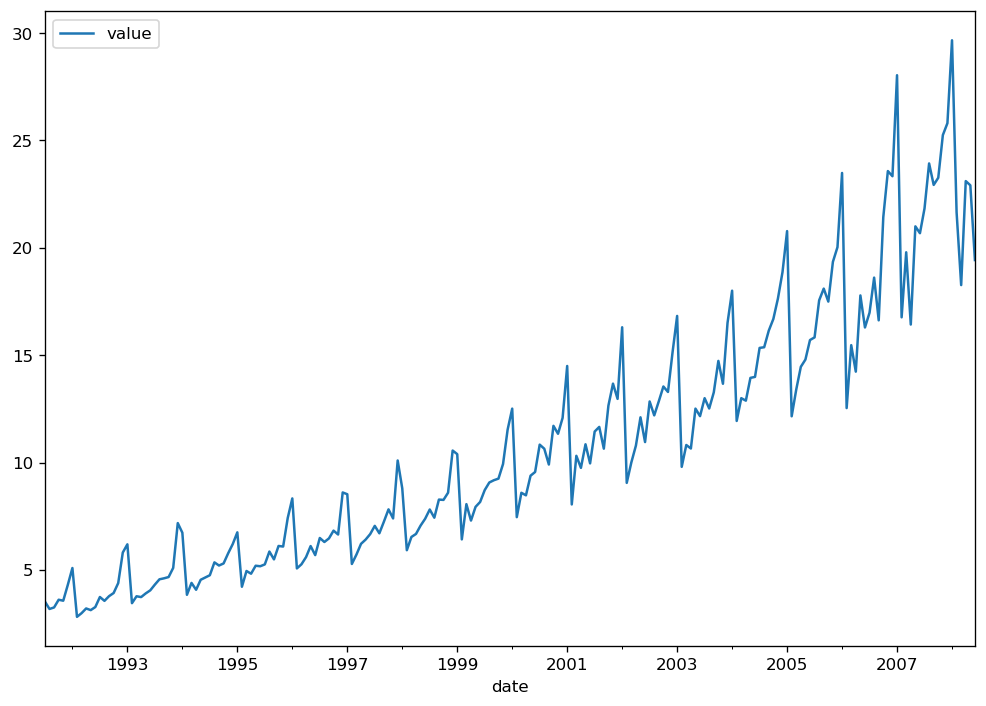

In [10]:
df.set_index("date").plot()

In [15]:
# Si quisiéramos, también podríamos haber definido el índice en el momento de lectura:
df = pd.read_csv('data/a10.csv',
                 parse_dates = ['date'],
                 index_col='date')
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [16]:
# Si tuviéramos algún tipo de inconveniente a la hora de definir la fecha, siempre podríamos leerla como string:
df['fecha_str'] = df.index.astype(str)

# Crearnos independientemente cada variable de la fecha (año, mes y día) y castearlas a int:
df[['year', 'month', 'day']] = df['fecha_str'].str.split('-', expand=True)
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)
df['day'] = df['day'].astype(int)

# Y terminar formando nuestro datetime:
df['new_date'] = pd.to_datetime(df[['year', 'month', 'day']])
df.head()

,value,fecha_str,year,month,day,new_date
date,,,,,,
1991-07-01,3.526591,1991-07-01,1991,7,1,1991-07-01
1991-08-01,3.180891,1991-08-01,1991,8,1,1991-08-01
1991-09-01,3.252221,1991-09-01,1991,9,1,1991-09-01
1991-10-01,3.611003,1991-10-01,1991,10,1,1991-10-01
1991-11-01,3.565869,1991-11-01,1991,11,1,1991-11-01


## 2. Panel data

Como hemos comentado en clase, los Panel data son la combinación de los Time Series básicos (donde se tenía el desarrollo temporal de las características de un individuo) y el cross-section (donde se disponían las características de varios individuos en un momento temporal definido).

De este modo, los Panel data nos ofrecen la evolución temporal de diferentes características de varios individuos. A continuación, se recoge un ejemplo de este tipo de datos:

In [17]:
df = pd.read_csv('data/MarketArrivals.csv')
df = df.loc[df.market=='MUMBAI', :]
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,January-2004
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,January-2005
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,January-2006
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,January-2007
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,January-2008


## 3. Representando Series Temporales

Teniendo los datos en formato fecha y ordenados, la representación gráfica se vuelve muy sencilla. Un `plot` de matplotlib.pyplot sería suficiente.

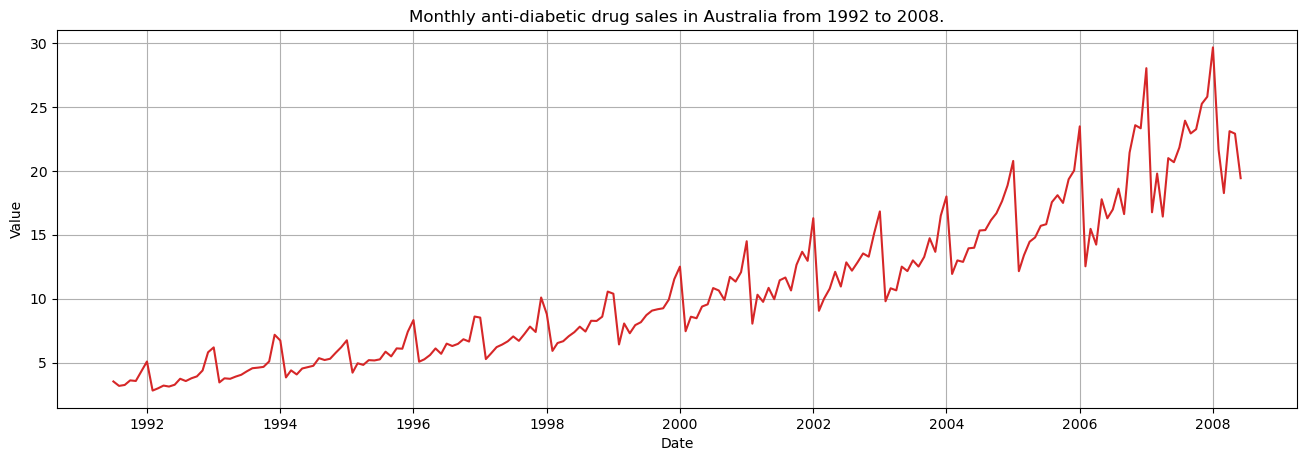

In [22]:
df = pd.read_csv('data/a10.csv', parse_dates=['date'], index_col='date')

# Nos creamos una función 
plt.figure(figsize=(16,5), dpi=100)
plt.plot(df.index, df.value, color='tab:red')
plt.gca().set(title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.', xlabel='Date', ylabel='Value')
plt.grid()
plt.show()

Podemos enfatizar el crecimiento de los datos creando una gráfica simétrica

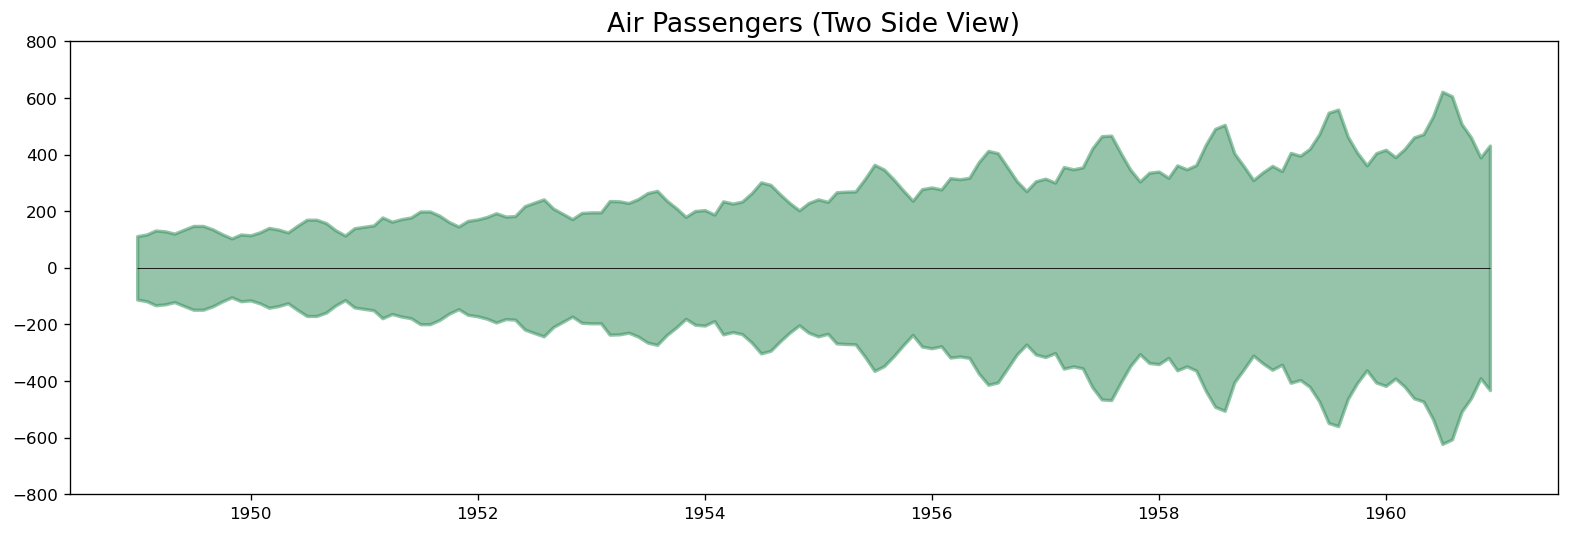

In [26]:
# Importamos los datos:
df = pd.read_csv('data/AirPassengers.csv', parse_dates=['date'])
x = df['date'].values
y1 = df['value'].values

# Representamos los datos de forma simétrica, rellenando desde -y a y:
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.date), xmax=np.max(df.date), linewidth=.5)
plt.show()

Puesto que tenemos datos mensuales, con cierto patrón repetitivo, podremos visualizar una comparativa año a año.

Si nos fijamos bien, podemos observar que hay un gran consumo de fármacos en enero, y gran caída en febrero.

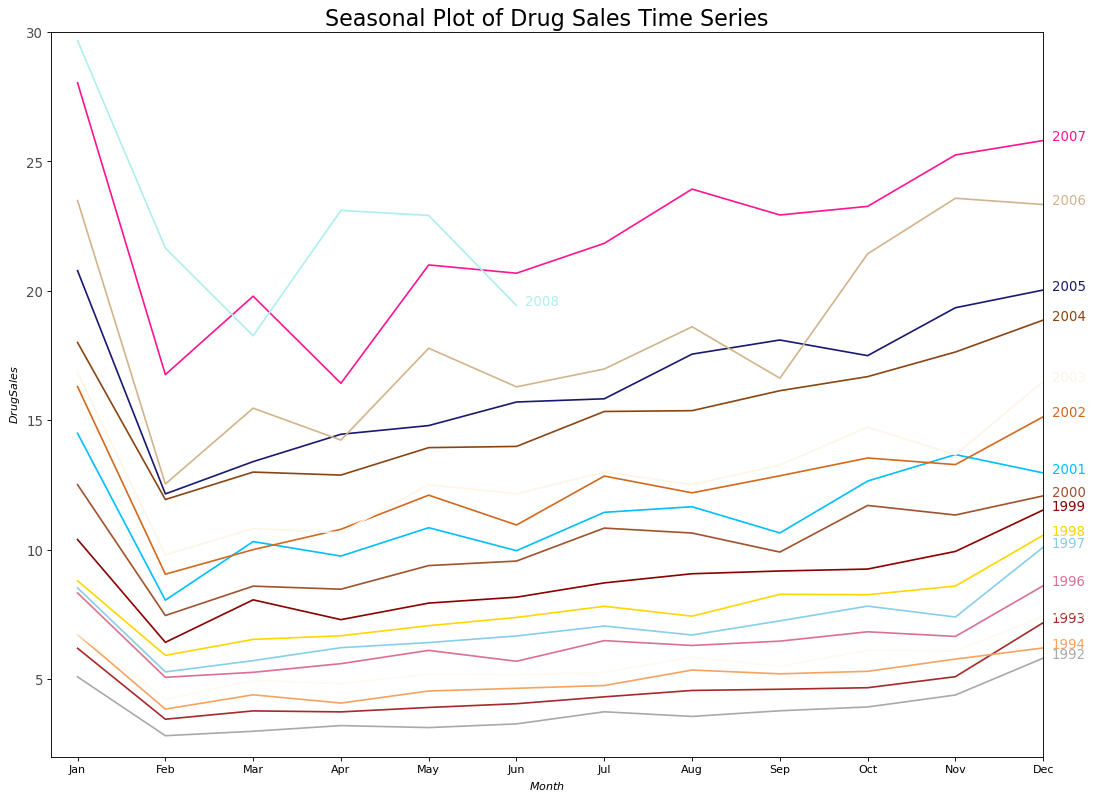

In [32]:
# Importamos los datos:
df = pd.read_csv('data/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Tratamos los datos:
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Nos creamos una lista con colores elegidos aleatoriamente de los que ya vienen predefinidos en matplotlib. 
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.cnames.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

*NOTA*: Si te has fijado, hemos utilizado la sentencia ``mpl.colors.cnames.keys()`` para generar colores. Realmente, lo que nos devuelve ``mpl.colors.cnames`` es un diccionario con los colores y su implementación. Sin embargo, a nosotros solo con el nombre del color ya nos vale:

In [34]:
mpl.colors.cnames

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3

Volviendo a la gráfica anterior, vemos que cada año van incrementando las ventas, pero no terminamos de apreciarlo del todo bien en dicha gráfica. Para solucionarlo, podemos hacer uso de los diagramas de caja, donde podríamos ver cómo evolucionan las ventas anuales para destacar mejor ese progreso, y cómo varía cada año:

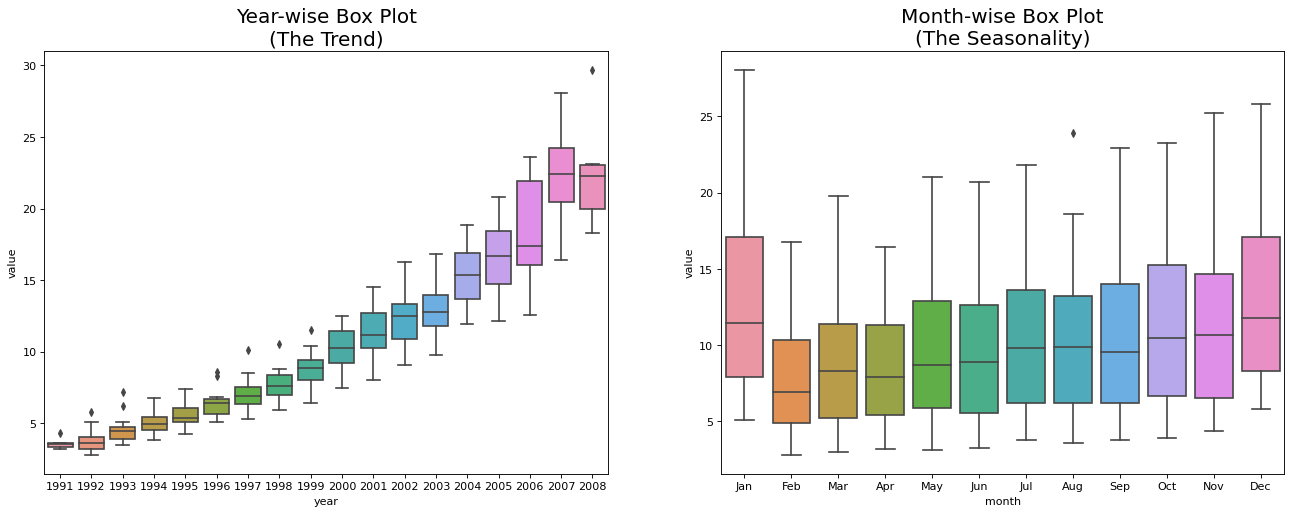

In [35]:
# Leemos datos
df = pd.read_csv('data/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Preprocesamos:
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Creamos gráfico de caja para la tendencia (anual) y la estacionalidad (mensual):
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Identificamos las gráficas:
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

## 4. Descomposición de Series Temporales

Como hemos mencionado en la teoría, las series temporales se pueden descomponer en:

**Modelo aditivo**: Y(t) = T(t) + S(t) + c(t) + e(t)

**Modelo multiplicativo**: Y(t) = T(t) * S(t) * c(t) * e(t)

Llevarlo a la práctica en Python es algo realmente sencillo. Nos ayudaremos de la función ``seasonal_decompose`` del un submódulo de ``statsmodel``:

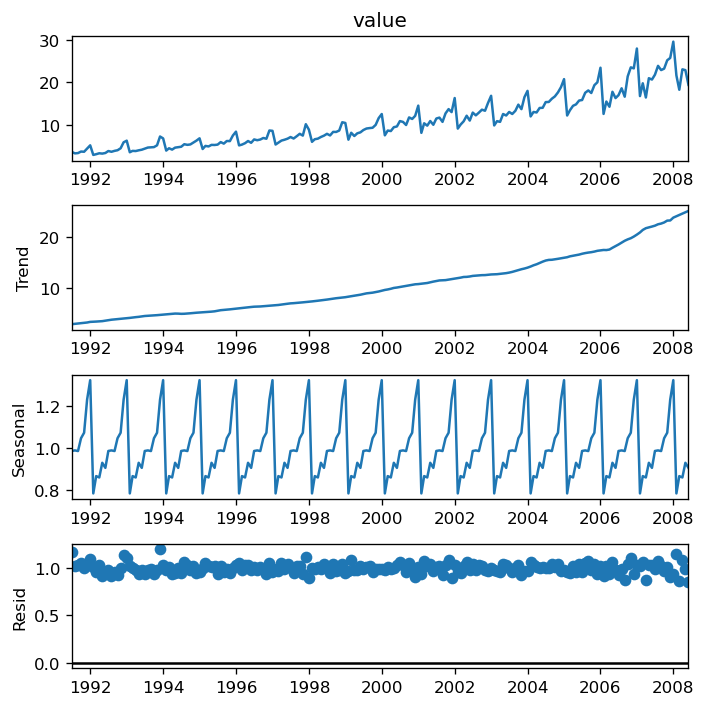

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Leemos datos
df = pd.read_csv('data/a10.csv', parse_dates=['date'], index_col='date')

# Modelo aditivo:
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Modelo multiplicativo
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Gráficas:
plt.rcParams.update({'figure.figsize': (6,6)})
result_mul.plot();

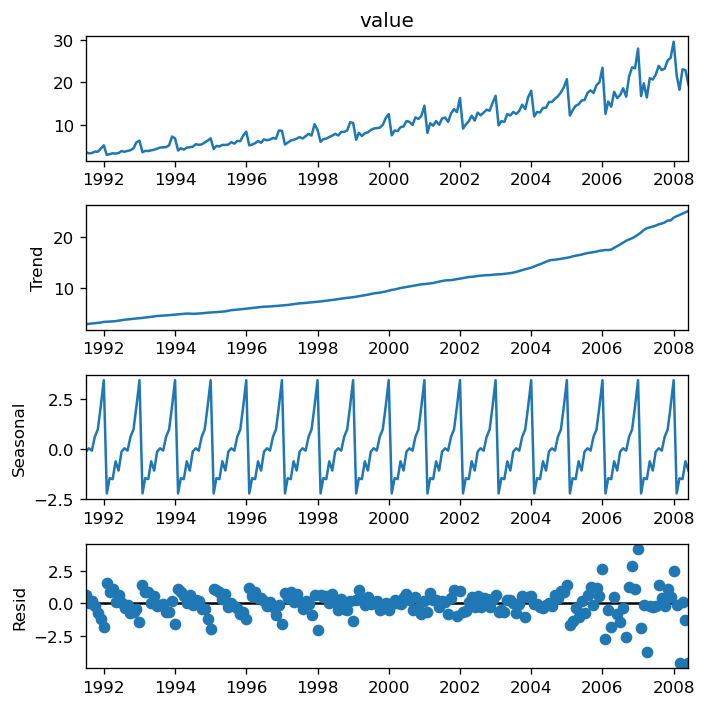

In [39]:
result_add.plot();

Una vez hecho esto, podríamos recoger toda esta información a un DataFrame:

In [43]:
df_reconstructed_mul = pd.concat([result_mul.seasonal,
                                  result_mul.trend,
                                  result_mul.resid,
                                  result_mul.observed], axis=1)
df_reconstructed_mul.head()

,seasonal,trend,resid,value
date,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869


In [44]:
df_reconstructed_add = pd.concat([result_add.seasonal,
                                  result_add.trend,
                                  result_add.resid,
                                  result_add.observed], axis=1)
df_reconstructed_add.head()

,seasonal,trend,resid,value
date,,,,
1991-07-01,-0.140765,3.060085,0.607271,3.526591
1991-08-01,0.027747,3.124765,0.028379,3.180891
1991-09-01,-0.090361,3.189445,0.153137,3.252221
1991-10-01,0.602876,3.254125,-0.245998,3.611003
1991-11-01,0.970698,3.318805,-0.723634,3.565869


## 5. Test de Raíz Unitaria (Root Test Stationary)

Para comprobar si la series temporal es estacionaria, haremos los root test. La hipótesis nula de los test supone que la serie NO es estacionaria.

Si el resultado del test queda por **DEBAJO** del nivel de significación (**0.05**), rechazaremos la hipótesis nula en favor de la alternativa: la serie será **estacionaria**. En caso contrario la serie NO es estacionaria y por tanto habrá que aplicar técnicas de diferenciación.

En este caso, el test que utilizaremos será el *Augmented Dickey Fuller test*:

In [47]:
from statsmodels.tsa.stattools import adfuller
df = pd.read_csv('data/a10.csv', parse_dates=['date'])

result = adfuller(df['value'].values, autolag = 'AIC')
result[1]

1.0

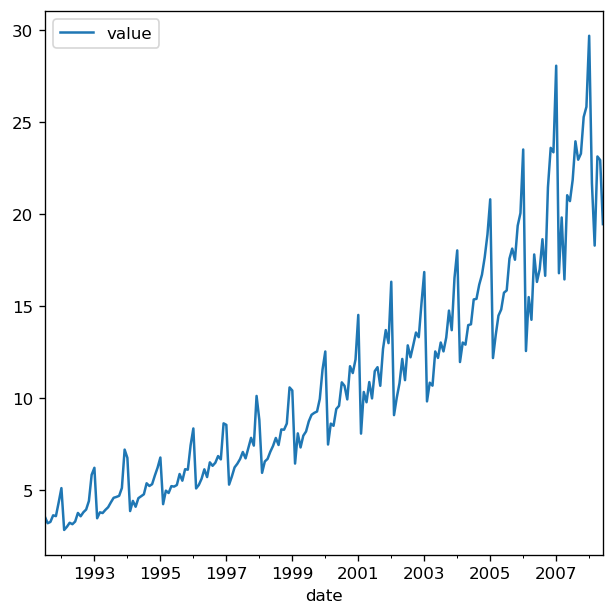

In [48]:
df = pd.read_csv('data/a10.csv', parse_dates=['date'], index_col='date')
df.plot()

No parece que nos haya salido muy estacionaria... Bueno, ya lo veíamos en las gráficas, así que no nos pilla de sorpresa. Para solucionarlo, tendremos que eliminar la tendencia y la estacionalidad.

## 6. Eliminando la tendencia de una serie temporal

Veremos 2 formas de eliminar esa componente que refleja la tendencia de los datos:
  * Descomposición estacional: usando la función ``seasonal_decompose`` de ``statsmodels.tsa.seasonal``
  * Haciendo diferencias

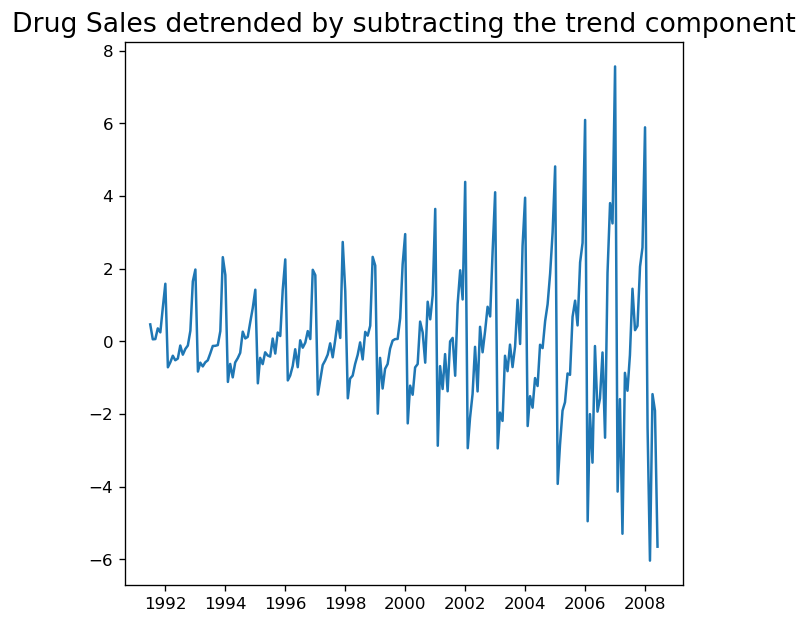

In [49]:
# Descomposición estacional:
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv('data/a10.csv',
                 parse_dates=['date'],
                 index_col='date')

result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')
detrended = df.value.values - result_add.trend
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the trend component', fontsize=16);

In [51]:
# Comprobamos si es estacionaria mediante el análisis ADF (recuerda: si es menor que 0.05, es estacionaria):
result = adfuller(detrended.values, autolag = 'AIC')
result[1]

0.00028544613612297977

Bien. Parece que ha funcionado.

Sin embargo, probemos algo más a ver si también nos sirve para convertir nuestros datos a estacionarios. Calculemos las diferencias:

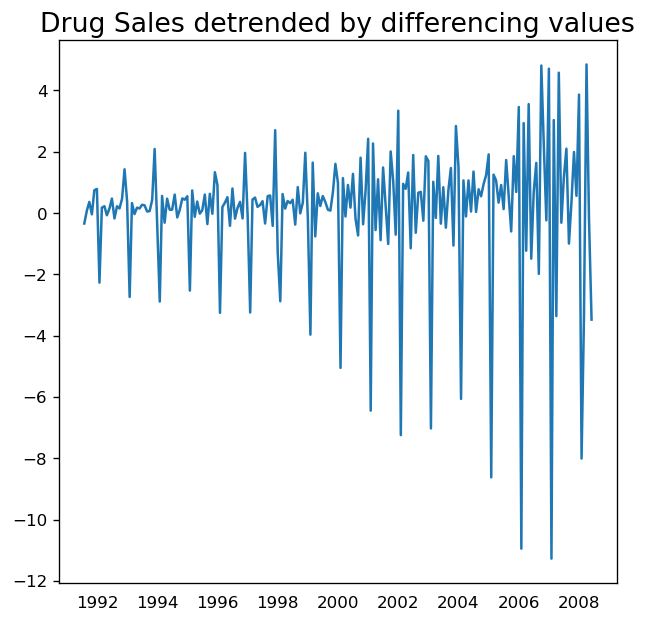

In [103]:
df = pd.read_csv('data/a10.csv',
                 parse_dates=['date'],
                 index_col='date')

plt.plot(df['value'].diff())

plt.title('Drug Sales detrended by differencing values', fontsize=16);

In [104]:
result = adfuller(df['value'].diff().dropna().values, autolag = 'AIC')
result[1]

0.11665341686468317

## 7. Eliminando la estacionalidad

También podemos eliminar la componente estacional de la descomposición anterior.

Vemos en este ejemplo que el modelo aditivo no es el ideal, ya que siguen apareciendo patrones estacionales en la serie.

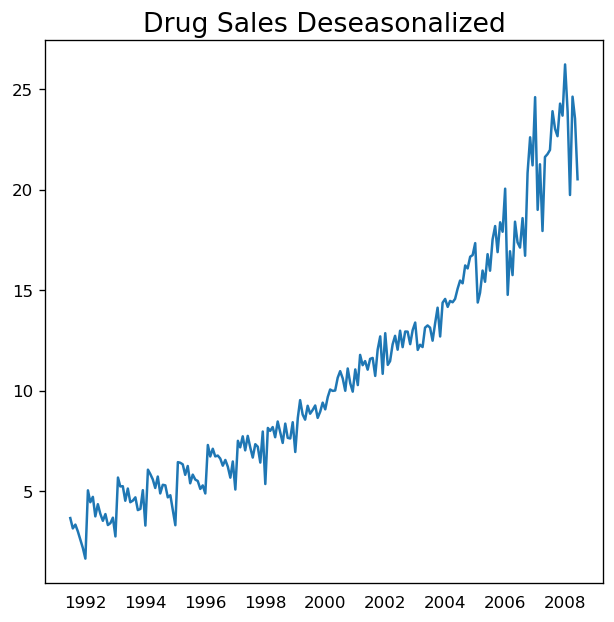

In [105]:
# Time Series Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Deseasonalize
deseasonalized = df['value'].values - result_add.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Drug Sales Deseasonalized', fontsize=16);

En cambio, si probamos con un modelo multiplicativo, parece que estos problemas se solucionan:

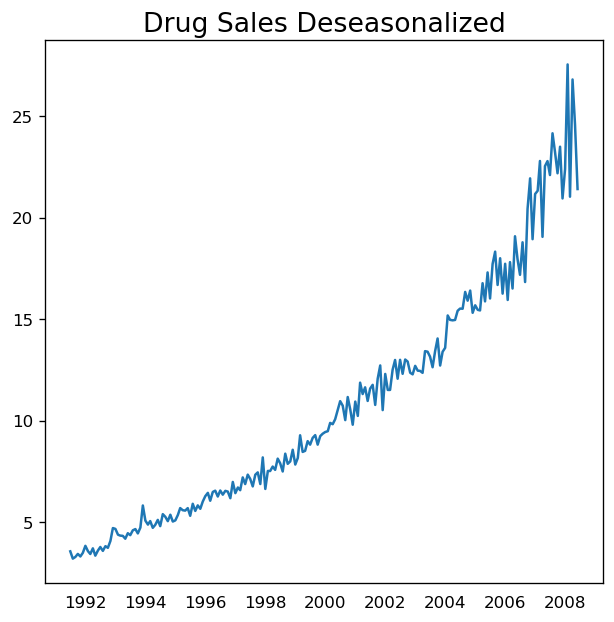

In [106]:
# Time Series Decomposition
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Deseasonalize
deseasonalized = df.value.values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Drug Sales Deseasonalized', fontsize=16);

Ya de paso, comprobamos la eliminación de la tendencia con este método:

In [107]:
# Comprobamos si es estacionaria mediante el análisis ADF (recuerda: si es menor que 0.05, es estacionaria):
detrended = df.value.values/result_mul.trend
result = adfuller(detrended.values, autolag = 'AIC')
result[1]

1.6980804279959286e-05

Parece que también.

## 7. Comprobación de la estacionalidad en un Time Series

Lo mejor y más rápido para ver estas cosas, es mediante un simple gráfico, pero también puede resultar útil hacer la representación de la autocorrelación.

Vemos claramente los picos que hay cada 12 lags.

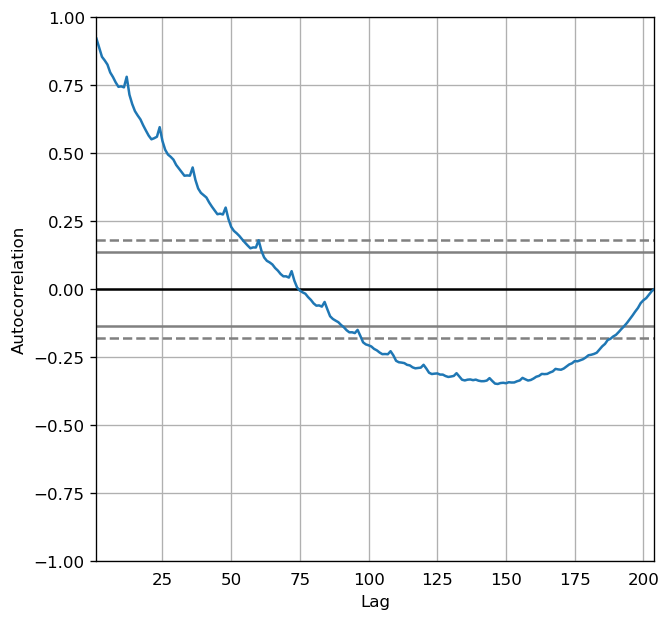

In [108]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['value'].tolist());

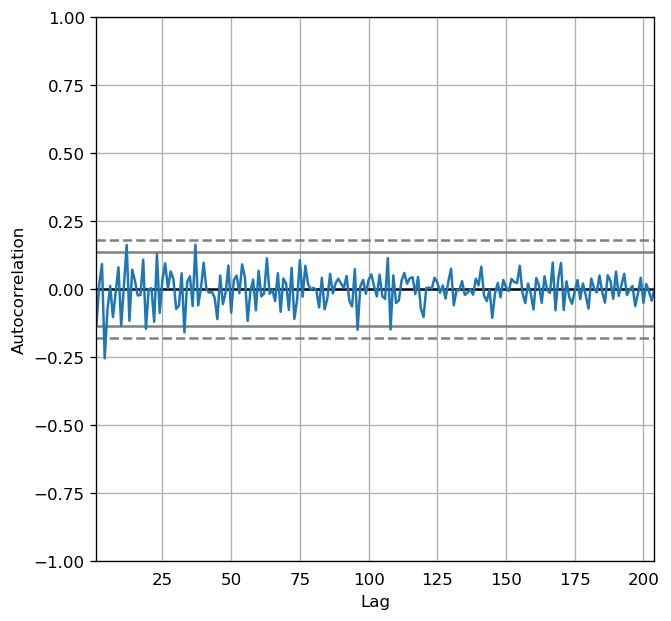

In [109]:
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')
detrended_deseasonalize = df.value.values / result_mul.trend / result_mul.seasonal

autocorrelation_plot(detrended_deseasonalize.tolist());

Como puedes comprobar, con esta técnica hemos reducido la influencia de las componentes a prácticamente nada. Se sitúan por debajo de ese umbral, que se suele colocar en:

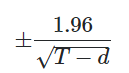

donde $T$ es el tamaño de la muestra, y $d$ el número de lags.

## 8. Valores nulos

Ahora veamos cómo tratar los valores nulos dentro de una serie temporal. No podríamos utilizar métodos como la moda o la media de todos los datos porque serían valores que aún no se habrían producido.

Tenemos diferentes métodos, como veremos a continuación. Para empezar, leeremos el dataset ``data/a10_missings.csv``, que contiene algunos de los datos de ``data/a10.csv`` y le faltan otros:

In [99]:
df = pd.read_csv('data/a10_missings.csv', parse_dates=['date'], index_col='date')
df

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,NaN
1991-10-01,3.611003
1991-11-01,NaN
...,...
1999-06-01,8.165323
1999-07-01,NaN
1999-08-01,9.070964


<ipython-input-100-e6f19becee53>:72: RuntimeWarning: Mean of empty slice
  if np.isnan(np.nanmean(ts_seas)):


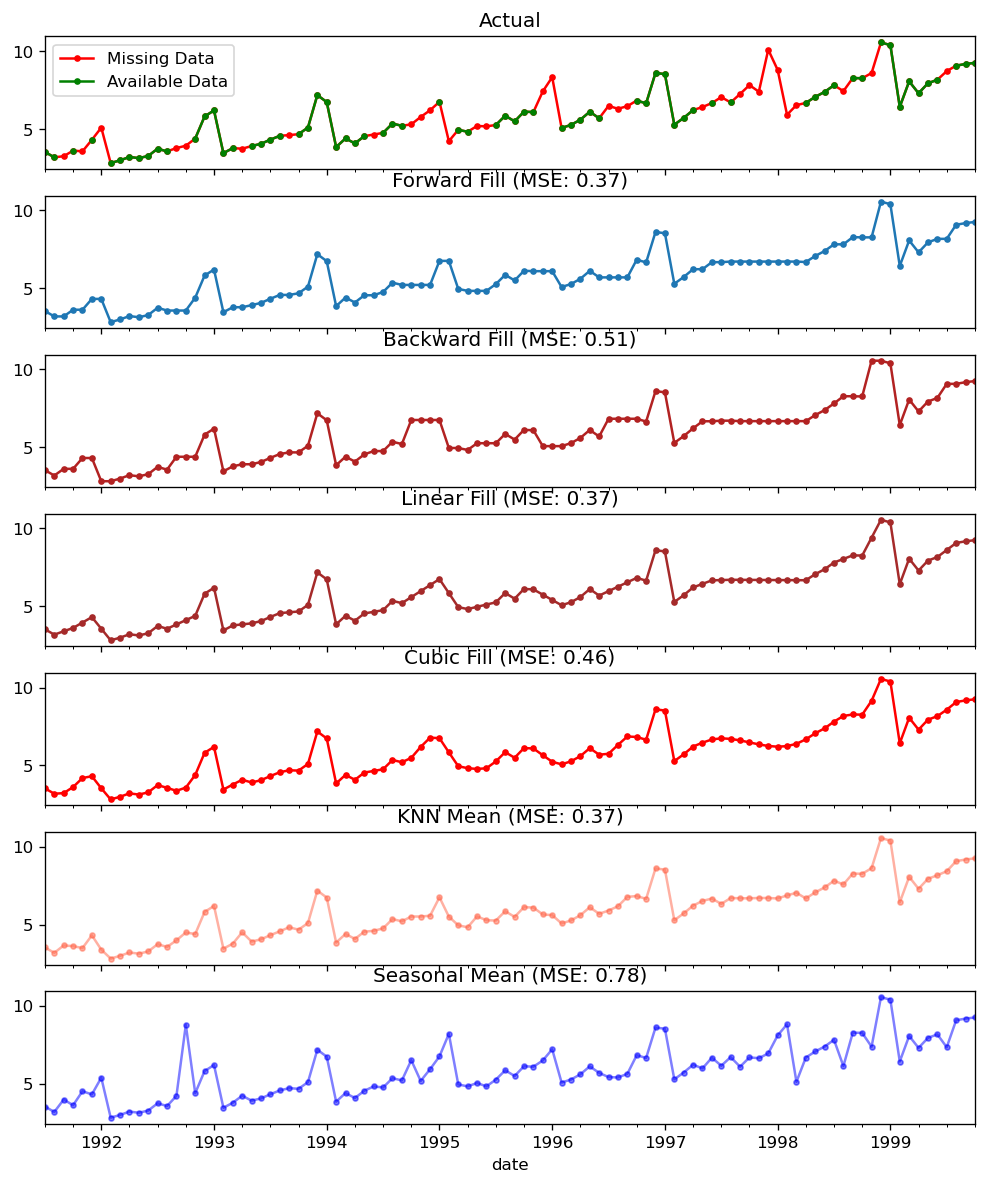

In [100]:
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
from scipy import interpolate
df_orig = pd.read_csv('data/a10.csv', parse_dates=['date'], index_col='date').head(100)
df = pd.read_csv('data/a10_missings.csv', parse_dates=['date'], index_col='date')

fig, axes = plt.subplots(7, 1, sharex=True, figsize=(10, 12))
plt.rcParams.update({'xtick.bottom' : False})

## 1. Valores reales:
df_orig.plot(title='Actual', ax=axes[0], label='Actual', color='red', style=".-")
df.plot(title='Actual', ax=axes[0], label='Actual', color='green', style=".-")
axes[0].legend(["Missing Data", "Available Data"])


## 2. Forward Fill:
df_ffill = df.ffill()
error = np.round(mean_squared_error(df_orig['value'], df_ffill['value']), 2)
df_ffill['value'].plot(title='Forward Fill (MSE: ' + str(error) +")", ax=axes[1], label='Forward Fill', style=".-")


## 3. Backward Fill:
df_bfill = df.bfill()
error = np.round(mean_squared_error(df_orig['value'], df_bfill['value']), 2)
df_bfill['value'].plot(title="Backward Fill (MSE: " + str(error) +")", ax=axes[2], label='Back Fill', color='firebrick', style=".-")

## 4. Interpolación lineal:
df['rownum'] = np.arange(df.shape[0])
df_nona = df.dropna(subset=['value'])
f = interp1d(df_nona['rownum'], df_nona['value'])
df['linear_fill'] = f(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['linear_fill']), 2)
df['linear_fill'].plot(title="Linear Fill (MSE: " + str(error) +")", ax=axes[3], label='Cubic Fill', color='brown', style=".-")

## 5. Interpolación cúbica:
f2 = interp1d(df_nona['rownum'], df_nona['value'], kind='cubic')
df['cubic_fill'] = f2(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['cubic_fill']), 2)
df['cubic_fill'].plot(title="Cubic Fill (MSE: " + str(error) +")", ax=axes[4], label='Cubic Fill', color='red', style=".-")

# Referencias interesantes para la interpolación:
# https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
# https://docs.scipy.org/doc/scipy/reference/interpolate.html

## 6. KNN: Media de los 'n' anteriores vecinos'
def knn_mean(ts, n):
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            n_by_2 = np.ceil(n/2)
            lower = np.max([0, int(i-n_by_2)])
            upper = np.min([len(ts)+1, int(i+n_by_2)])
            ts_near = np.concatenate([ts[lower:i], ts[i:upper]])
            out[i] = np.nanmean(ts_near)
    return out

df['knn_mean'] = knn_mean(df.value.values, 8)
error = np.round(mean_squared_error(df_orig['value'], df['knn_mean']), 2)
df['knn_mean'].plot(title="KNN Mean (MSE: " + str(error) +")", ax=axes[5], label='KNN Mean', color='tomato', alpha=0.5, style=".-")

## 7. Media estacionalidad:
def seasonal_mean(ts, n, lr=0.7):
    """
    Compute the mean of corresponding seasonal periods
    ts: 1D array-like of the time series
    n: Seasonal window length of the time series
    """
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            ts_seas = ts[i-1::-n]  # previous seasons only
            if np.isnan(np.nanmean(ts_seas)):
                ts_seas = np.concatenate([ts[i-1::-n], ts[i::n]])  # previous and forward
            out[i] = np.nanmean(ts_seas) * lr
    return out

df['seasonal_mean'] = seasonal_mean(df.value, n=12, lr=1.25)
error = np.round(mean_squared_error(df_orig['value'], df['seasonal_mean']), 2)
df['seasonal_mean'].plot(title="Seasonal Mean (MSE: " + str(error) +")", ax=axes[6], label='Seasonal Mean', color='blue', alpha=0.5, style=".-");

## 9. Smoothing (Suavizado)

Cómo suavizar la gráfica para ver mejor la tendencia. En este caso, utilizaremos un par de métodos:
  * MA (Moving Average): hace la media móvil de los datos con ventanas de determinado tamaño
  * [LOWESS](https://www.statsmodels.org/devel/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html): se basa en una regresión lineal para hacer las estimaciones de suavizado

NameError: name 'df_loess_5' is not defined

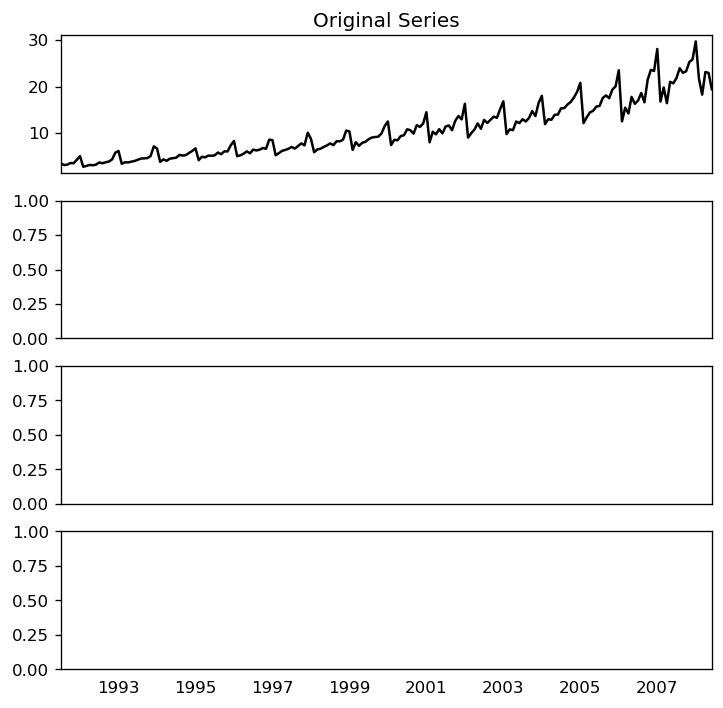

In [101]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# Import
df_orig = pd.read_csv('data/a10.csv', parse_dates=['date'], index_col='date')

# 1. Medias móvviles (MA):
df_ma = df_orig['value'].rolling(3, center=True, closed='both').mean()

# 2. Lowess Smoothing (5% and 15%):
df_lowess_5 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.05)[:, 1], index=df_orig.index, columns=['value'])
df_lowess_15 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.15)[:, 1], index=df_orig.index, columns=['value'])

# Plot
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
df_orig['value'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['value'].plot(ax=axes[1], title='Lowess Smoothed 5%')
df_loess_15['value'].plot(ax=axes[2], title='Lowess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()